In [1]:
import rivalry as rv
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [21]:
#from initialparameters.txt
p = {}
p['beta']=1.42528
p['alpha']=0
p['gamma'] = 2.07703
p['tau_a']=1248.0
p['tau_u']=10
p['sigma']=0.0419821
p['mu']=0.9
p['ks']=0.1918590
p['kc']=0.00253604
p['kb'] = 0.109369

#S = [p[5] + p[6]*C;p[5] - p[6]*C;p[7]]

In [22]:
tot=200000
tpre=0
dt = 1

In [27]:
#unpack fixed parameters
param = p
beta = param['beta']
alpha = param['alpha']
gamma = param['gamma']
tau_a = param['tau_a']
sigma = param['sigma']
mu = param['mu']
tau_u = param['tau_u']

#input stimulus
r=0.0
ks = p['ks']
kc = p['kc']
kb = p['kb']
k1 = rv.stimulus(ks,kc,r)
k2 = rv.stimulus(ks,kc,-r)#weaker stimulus

tf = tot
equil = tpre
totaltime= tf + equil

#system variables
U = np.random.uniform(0,1,(2,2))
A = np.random.uniform(0,1,(2,1))
Z = np.random.uniform(0,1,(2,1))

u1 = []
u2 = []
a1 = []
a2 = []
z1 = []
z2 = []
t = []
i=-1

In [28]:
print U
print A
print Z

[[ 0.24076329  0.18126197]
 [ 0.17673676  0.03179092]]
[[ 0.41150308]
 [ 0.94570748]]
[[ 0.49938123]
 [ 0.98517665]]


In [29]:
while i < totaltime:
    i += 1
    t.append(i*dt)
    stim_on = int(equil<i)
    S1 = k1
    S2 = k2
    Z[0,0] = Z[0,0] -dt*(Z[0,0] + np.sqrt(dt)*sigma*np.random.randn())
    Z[1,0] = Z[1,0] -dt*(Z[1,0] + np.sqrt(dt)*sigma*np.random.randn())
    
    U[0,1] = U[0,0]+dt*(-U[0,0]+rv.gain_pl_sqrt(kb+S1 - beta*A[1,0]*U[1,0] +alpha*U[0,0] + Z[0,0]*(1+mu*U[0,0])))/tau_u
    U[1,1] = U[1,0]+dt*(-U[1,0]+rv.gain_pl_sqrt(kb+S2 - beta*A[0,0]*U[0,0] +alpha*U[0,1] + Z[1,0]*(1+mu*U[1,0])))/tau_u
    U[0,0] = U[0,1]
    U[1,0] = U[1,1]

    A[0,0] = A[0,0] + dt*(1 - A[0,0] - gamma*A[0,0]*U[0,0])/tau_a
    A[1,0] = A[1,0] + dt*(1 - A[1,0] - gamma*A[1,0]*U[1,0])/tau_a

    u1.append(U[0,0])
    u2.append(U[1,0])
    a1.append(A[0,0])
    a2.append(A[1,0])
    z1.append(Z[0,0])
    z2.append(Z[1,0])

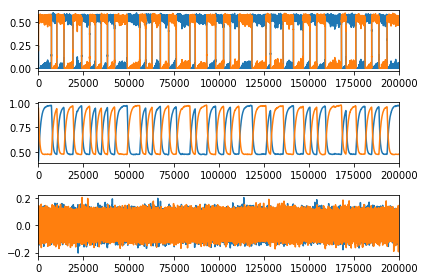

In [30]:
xmax=len(t)
fig, axs = plt.subplots(3,1)
axs[0].plot(t,u1,t,u2)
axs[0].set_xlim(0,xmax)
axs[1].plot(t,a1,t,a2)
axs[1].set_xlim(0,xmax)
axs[2].plot(t,z1,t,z2)
axs[2].set_xlim(0,xmax)
fig.tight_layout()